In [29]:
import pandas as pd
import numpy as np
import csv
import matplotlib as mt
import seaborn as sns
%matplotlib inline
from collections import Counter
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
train.head()
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
#Checking the Dimension of the data frames
print(train.shape)
print(test.shape)


(614, 13)
(367, 12)


In [6]:
#Merging the Data frames
all = pd.concat([train,test],axis=0)

In [7]:
all.head()
all.reset_index(inplace=True,drop=True)#

In [8]:
all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
ApplicantIncome      981 non-null int64
CoapplicantIncome    981 non-null float64
Credit_History       902 non-null float64
Dependents           956 non-null object
Education            981 non-null object
Gender               957 non-null object
LoanAmount           954 non-null float64
Loan_Amount_Term     961 non-null float64
Loan_ID              981 non-null object
Loan_Status          614 non-null object
Married              978 non-null object
Property_Area        981 non-null object
Self_Employed        926 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 99.7+ KB


In [9]:
all.isnull().sum()#gives the missing value of all columns

ApplicantIncome        0
CoapplicantIncome      0
Credit_History        79
Dependents            25
Education              0
Gender                24
LoanAmount            27
Loan_Amount_Term      20
Loan_ID                0
Loan_Status          367
Married                3
Property_Area          0
Self_Employed         55
dtype: int64

In [10]:
Counter(all['Dependents'])

Counter({'0': 545, '1': 160, '2': 160, '3+': 91, nan: 25})

In [11]:
#Dependents contain 0 value at max occurences, so we will fill missing dependents value with 0

In [12]:
Dependents_null = all[all['Dependents'].isnull()].index.tolist()
print(Dependents_null)

[102, 104, 120, 226, 228, 293, 301, 332, 335, 346, 355, 435, 517, 571, 597, 660, 684, 725, 752, 816, 861, 865, 879, 916, 926]


In [13]:
all['Dependents'].iloc[Dependents_null]="0"

C:\Users\SAN\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [14]:
Counter(all['Dependents'])

Counter({'0': 570, '1': 160, '2': 160, '3+': 91})

In [15]:
Counter(all['Gender'])

Counter({'Male': 775, 'Female': 182, nan: 24})

In [16]:
#Gender is max occured with Male, so we will fill missing values with Male

In [17]:
Gender_null = all[all['Gender'].isnull()].index.tolist()
print(Gender_null)

[23, 126, 171, 188, 314, 334, 460, 467, 477, 507, 576, 588, 592, 636, 665, 720, 752, 823, 845, 859, 893, 910, 917, 932]


In [18]:
all['Gender'].iloc[Gender_null]="Male"

C:\Users\SAN\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [19]:
Counter(all['Gender'])

Counter({'Female': 182, 'Male': 799})

# Pair Plot Between Applicant Income and Loan Status

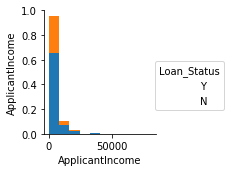

In [32]:
sns.pairplot(all[["ApplicantIncome","Loan_Status"]],hue="Loan_Status")

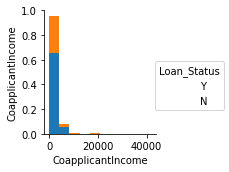

In [33]:
sns.pairplot(all[["CoapplicantIncome","Loan_Status"]],hue="Loan_Status")

# Box Plot sample, which helps us to identiy the Outliers

Text(0.5,1,'Box Plot')

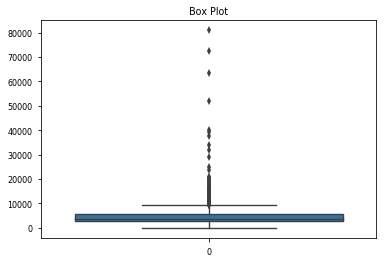

In [44]:
sns.boxplot(data=all['ApplicantIncome']).set_title("Box Plot")

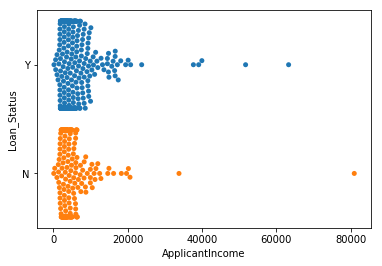

In [23]:
sns.swarmplot(x='ApplicantIncome', y='Loan_Status', data=all)

# To Find Corelation between the attributes we use heatmap

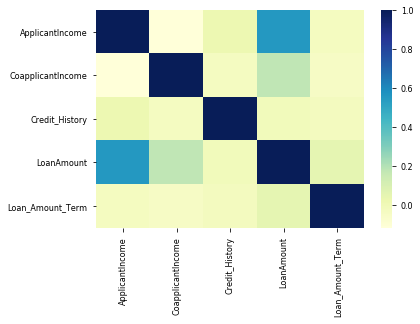

In [40]:
corr = all.corr()
sns.heatmap(corr,cmap="YlGnBu")

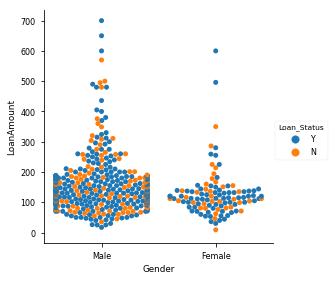

In [42]:
sns.factorplot(x='Gender', y='LoanAmount',hue='Loan_Status',kind='swarm',data=all)

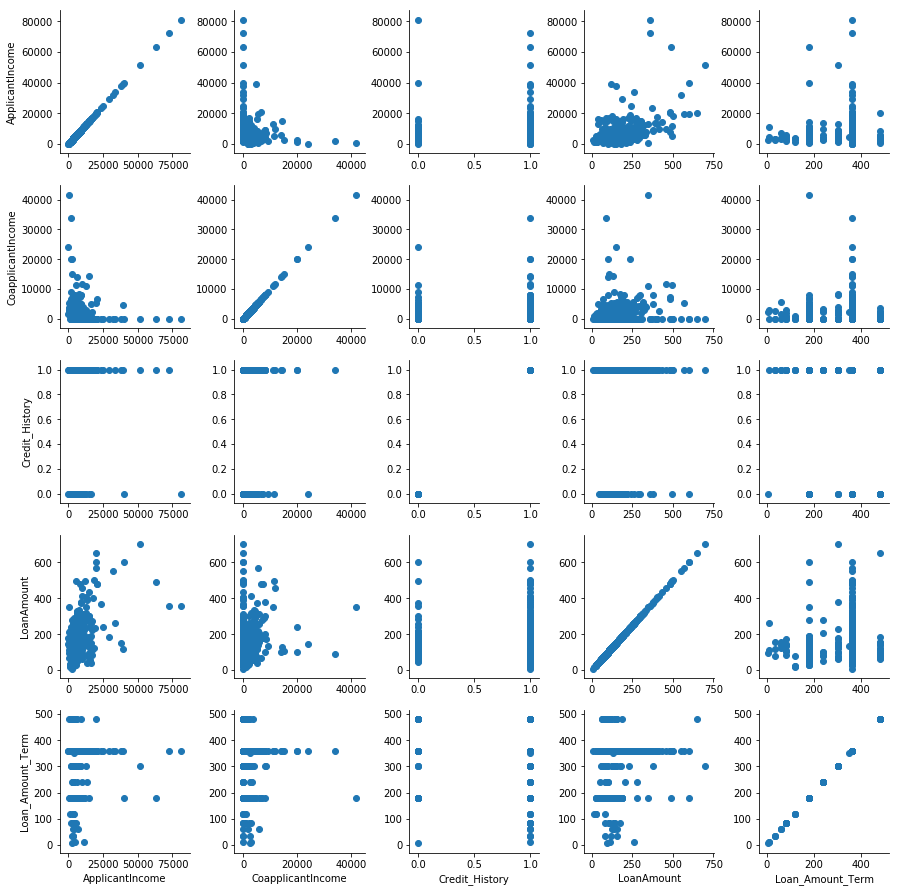

In [30]:
sa = sns.PairGrid(all)
sa.map(plt.scatter);

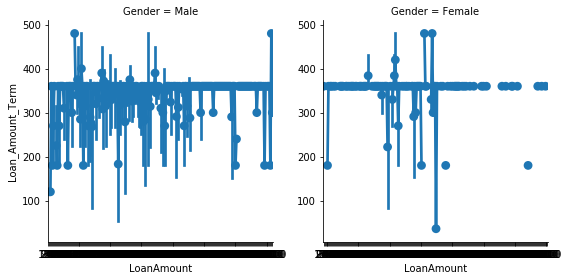

In [34]:
sns.factorplot(data=all, x="LoanAmount", y="Loan_Amount_Term", col="Gender")